<a href="https://colab.research.google.com/github/RohanSubramani/Miscellaneous/blob/main/part4_Optimization_(exercises).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/callummcdougall/Fundamentals/main/images/stats.png" width="350">


Colab: [**exercises**](https://colab.research.google.com/drive/12PiedkLJH9GkIu5F_QC7iFf8gJb3k8mp) | [**solutions**](https://colab.research.google.com/drive/1yKhqfOJUTcdu0zhuRONjXLCmoLx7frxP)

Please send any problems / bugs on the `#errata` channel in the [Slack group](https://join.slack.com/t/arena-la82367/shared_invite/zt-1uvoagohe-JUv9xB7Vr143pdx1UBPrzQ), and ask any questions on the dedicated channels for this chapter of material.


# [0.4] Optimization & Hyperparameters


## Introduction


In today's exercises, we will explore various optimization algorithms and their roles in training deep learning models. We will delve into the inner workings of different optimization techniques such as Stochastic Gradient Descent (SGD), RMSprop, and Adam, and learn how to implement them using code. Additionally, we will discuss the concept of loss landscapes and their significance in visualizing the challenges faced during the optimization process. By the end of this set of exercises, you will have a solid understanding of optimization algorithms and their impact on model performance. We'll also take a look at Weights and Biases, a tool that can be used to track and visualize the training process, and test different values of hyperparameters to find the most effective ones.


## Content & Learning Objectives


### 1️⃣ Optimizers

These exercises will take you through how different optimization algorithms work (specifically SGD, RMSprop and Adam). You'll write your own optimisers, and use plotting functions to visualise gradient descent on loss landscapes.

> ##### Learning Objectives
>
> * Understand how different optimization algorithms work
> * Translate pseudocode for these algorithms into code
> * Understand the idea of loss landscapes, and how they can visualize specific challenges in the optimization process

### 2️⃣ Weights and Biases

In this section, we'll look at methods for choosing hyperparameters effectively. You'll learn how to use **Weights and Biases**, a useful tool for hyperparameter search. By the end of today, you should be able to use Weights and Biases to train the ResNet you created in the last set of exercises.

> ##### Learning Objectives
>
> * Learn what the most important hyperparameters are, and methods for efficiently searching over hyperparameter space
> * Adapt your code from yesterday to log training runs to Weights & Biases, and use this service to run hyperparameter sweeps

### 3️⃣ Bonus

This section gives you suggestions for further exploration of optimizers, and Weights & Biases.


## Setup (don't read, just run!)


In [2]:
try:
    import google.colab # type: ignore
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # Install packages
    %pip install torchinfo
    %pip install transformer_lens
    %pip install pytorch-lightning

    # Code to download the necessary files (e.g. solutions, test funcs)
    import os, sys
    if not os.path.exists("chapter0_fundamentals"):
        !wget https://github.com/callummcdougall/ARENA_2.0/archive/refs/heads/main.zip
        !unzip /content/main.zip 'ARENA_2.0-main/chapter0_fundamentals/exercises/*'
        sys.path.append("/content/ARENA_2.0-main/chapter0_fundamentals/exercises")
        os.remove("/content/main.zip")
        os.rename("ARENA_2.0-main/chapter0_fundamentals", "chapter0_fundamentals")
        os.rmdir("ARENA_2.0-main")
        os.chdir("chapter0_fundamentals/exercises")
else:
    from IPython import get_ipython
    ipython = get_ipython()
    ipython.run_line_magic("load_ext", "autoreload")
    ipython.run_line_magic("autoreload", "2")

# Things that need to be done manually

# Nothing

# END

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.6 MB/s eta 0:00:0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.6/720.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 52.9 MB/s eta 0:00:00
--2023-06-13 11:40:27--  https://github.com/callummcdougall/ARENA_2.0/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/callummcdougall/ARENA_2.0/zip/refs/heads/main [following]
--2023-06-13 11:40:27--  https://codeload.github.com/callummcdougall/ARENA_2.0/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip    

In [1]:
import os; os.environ["ACCELERATE_DISABLE_RICH"] = "1"
import sys
import pandas as pd
import torch as t
from torch import optim
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
from typing import Callable, Iterable, Tuple, Optional
import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger, WandbLogger
from dataclasses import dataclass
from pathlib import Path
import numpy as np
from IPython.display import display, HTML

# Make sure exercises are in the path
chapter = r"chapter0_fundamentals"
exercises_dir = Path(f"{os.getcwd().split(chapter)[0]}/{chapter}/exercises").resolve()
section_dir = exercises_dir / "part4_optimization"
if str(exercises_dir) not in sys.path: sys.path.append(str(exercises_dir))
os.chdir(section_dir)

from plotly_utils import bar, imshow
from part3_resnets.solutions import IMAGENET_TRANSFORM, get_resnet_for_feature_extraction, plot_train_loss_and_test_accuracy_from_metrics
from part4_optimization.utils import plot_fn, plot_fn_with_points
import part4_optimization.tests as tests

device = t.device("cuda" if t.cuda.is_available() else "cpu")

MAIN = __name__ == "__main__"



<details>
<summary>Help - I get <code>ImportError: numpy.core.multiarray failed to import</code></summary>

This is an annoying colab-related error which I haven't been able to find a satisfying fix for. The setup code at the top of this notebook should have installed a version of numpy which works, although you'll have to click "Restart Runtime" (from the Runtime menu) to make this work. Make sure you don't re-run the cell with `pip install`s.

If this still doesn't work, please reach out to me at `callum@arena.education`.
</details>


# 1️⃣ Optimizers


> ##### Learning Objectives
>
> * Understand how different optimization algorithms work
> * Translate pseudocode for these algorithms into code
> * Understand the idea of loss landscapes, and how they can visualize specific challenges in the optimization process


## Reading

Some of these are strongly recommended, while others are optional. If you like, you can jump back to some of these videos while you're going through the material, if you feel like you need to.

* Andrew Ng's video series on gradient descent variants:
    * [Gradient Descent With Momentum](https://www.youtube.com/watch?v=k8fTYJPd3_I) (9 mins)
    * [RMSProp](https://www.youtube.com/watch?v=_e-LFe_igno) (7 mins)
    * [Adam](https://www.youtube.com/watch?v=JXQT_vxqwIs&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=23) (7 mins)
* [A Visual Explanation of Gradient Descent Methods](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)
* [Why Momentum Really Works (distill.pub)](https://distill.pub/2017/momentum/)


## Gradient Descent

Tomorrow, we'll look in detail about how the backpropagation algorithm works. But for now, let's take it as read that calling `loss.backward()` on a scalar `loss` will result in the computation of the gradients $\frac{\partial loss}{\partial w}$ for every parameter `w` in the model, and store these values in `w.grad`. How do we use these gradients to update our parameters in a way which decreases loss?


A loss function can be any differentiable function such that we prefer a lower value. To apply gradient descent, we start by initializing the parameters to random values (the details of this are subtle), and then repeatedly compute the gradient of the loss with respect to the model parameters. It [can be proven](https://tutorial.math.lamar.edu/Classes/CalcIII/DirectionalDeriv.aspx) that for an infinitesimal step, moving in the direction of the gradient would increase the loss by the largest amount out of all possible directions.

We actually want to decrease the loss, so we subtract the gradient to go in the opposite direction. Taking infinitesimal steps is no good, so we pick some learning rate $\lambda$ (also called the step size) and scale our step by that amount to obtain the update rule for gradient descent:

$$\theta_t \leftarrow \theta_{t-1} - \lambda \nabla L(\theta_{t-1})$$

We know that an infinitesimal step will decrease the loss, but a finite step will only do so if the loss function is linear enough in the neighbourhood of the current parameters. If the loss function is too curved, we might actually increase our loss.

The biggest advantage of this algorithm is that for N bytes of parameters, you only need N additional bytes of memory to store the gradients, which are of the same shape as the parameters. GPU memory is very limited, so this is an extremely relevant consideration. The amount of computation needed is also minimal: one multiply and one add per parameter.

The biggest disadvantage is that we're completely ignoring the curvature of the loss function, not captured by the gradient consisting of partial derivatives. Intuitively, we can take a larger step if the loss function is flat in some direction or a smaller step if it is very curved. Generally, you could represent this by some matrix P that pre-multiplies the gradients to rescale them to account for the curvature. $P$ is called a preconditioner, and gradient descent is equivalent to approximating $P$ by an identity matrix, which is a very bad approximation.

Most competing optimizers can be interpreted as trying to do something more sensible for $P$, subject to the constraint that GPU memory is at a premium. In particular, constructing $P$ explicitly is infeasible, since it's an $N \times N$ matrix and N can be hundreds of billions. One idea is to use a diagonal $P$, which only requires N additional memory. An example of a more sophisticated scheme is [Shampoo](https://arxiv.org/pdf/1802.09568.pdf).


> The algorithm is called **Shampoo** because you put shampoo on your hair before using conditioner, and this method is a pre-conditioner.
>
> If you take away just one thing from this entire curriculum, please don't let it be this.


## Stochastic Gradient Descent

The terms gradient descent and SGD are used loosely in deep learning. To be technical, there are three variations:

- Batch gradient descent - the loss function is the loss over the entire dataset. This requires too much computation unless the dataset is small, so it is rarely used in deep learning.
- Stochastic gradient descent - the loss function is the loss on a randomly selected example. Any particular loss may be completely in the wrong direction of the loss on the entire dataset, but in expectation it's in the right direction. This has some nice properties but doesn't parallelize well, so it is rarely used in deep learning.
- Mini-batch gradient descent - the loss function is the loss on a batch of examples of size `batch_size`. This is the standard in deep learning.

The class `torch.optim.SGD` can be used for any of these by varying the number of examples passed in. We will be using only mini-batch gradient descent in this course.


## Batch Size

In addition to choosing a learning rate or learning rate schedule, we need to choose the batch size or batch size schedule as well. Intuitively, using a larger batch means that the estimate of the gradient is closer to that of the true gradient over the entire dataset, but this requires more compute. Each element of the batch can be computed in parallel so with sufficient compute, one can increase the batch size without increasing wall-clock time. For small-scale experiments, a good heuristic is thus "fill up all of your GPU memory".

At a larger scale, we would expect diminishing returns of increasing the batch size, but empirically it's worse than that - a batch size that is too large generalizes more poorly in many scenarios. The intuition that a closer approximation to the true gradient is always better is therefore incorrect. See [this paper](https://arxiv.org/pdf/1706.02677.pdf) for one discussion of this.

For a batch size schedule, most commonly you'll see batch sizes increase over the course of training. The intuition is that a rough estimate of the proper direction is good enough early in training, but later in training it's important to preserve our progress and not "bounce around" too much.

You will commonly see batch sizes that are a multiple of 32. One motivation for this is that when using CUDA, threads are grouped into "warps" of 32 threads which execute the same instructions in parallel. So a batch size of 64 would allow two warps to be fully utilized, whereas a size of 65 would require waiting for a third warp to finish. As batch sizes become larger, this wastage becomes less important.

Powers of two are also common - the idea here is that work can be recursively divided up among different GPUs or within a GPU. For example, a matrix multiplication can be expressed by recursively dividing each matrix into four equal blocks and performing eight smaller matrix multiplications between the blocks.

In tomorrow's exercises, you'll have the option to expore batch sizes in more detail.


## Common Themes in Gradient-Based Optimizers


### Weight Decay

Weight decay means that on each iteration, in addition to a regular step, we also shrink each parameter very slightly towards 0 by multiplying a scaling factor close to 1, e.g. 0.9999. Empirically, this seems to help but there are no proofs that apply to deep neural networks.

In the case of linear regression, weight decay is mathematically equivalent to having a prior that each parameter is Gaussian distributed - in other words it's very unlikely that the true parameter values are very positive or very negative. This is an example of "**inductive bias**" - we make an assumption that helps us in the case where it's justified, and hurts us in the case where it's not justified.

For a `Linear` layer, it's common practice to apply weight decay only to the weight and not the bias. It's also common to not apply weight decay to the parameters of a batch normalization layer. Again, there is empirical evidence (such as [Jai et al 2018](https://arxiv.org/pdf/1807.11205.pdf)) and there are heuristic arguments to justify these choices, but no rigorous proofs. Note that PyTorch will implement weight decay on the weights *and* biases of linear layers by default - see the bonus exercises tomorrow for more on this.


### Momentum

Momentum means that the step includes a term proportional to a moving average of past gradients. [Distill.pub](https://distill.pub/2017/momentum/) has a great article on momentum, which you should definitely read if you have time. Don't worry if you don't understand all of it; skimming parts of it can be very informative. For instance, the first half discusses the **conditioning number** (a very important concept to understand in optimisation), and concludes by giving an intuitive argument for why we generally set the momentum parameter close to 1 for ill-conditioned problems (those with a very large conditioning number).


## Visualising optimization with pathological curvatures

A pathological curvature is a type of surface that is similar to ravines and is particularly tricky for plain SGD optimization. In words, pathological curvatures typically have a steep gradient in one direction with an optimum at the center, while in a second direction we have a slower gradient towards a (global) optimum. Let’s first create an example surface of this and visualize it:


In [ ]:
def pathological_curve_loss(x: t.Tensor, y: t.Tensor):
    # Example of a pathological curvature. There are many more possible, feel free to experiment here!
    x_loss = t.tanh(x) ** 2 + 0.01 * t.abs(x)
    y_loss = t.sigmoid(y)
    return x_loss + y_loss

plot_fn(pathological_curve_loss)

In terms of optimization, you can image that `x` and `y` are weight parameters, and the curvature represents the loss surface over the space of `x` and `y`. Note that in typical networks, we have many, many more parameters than two, and such curvatures can occur in multi-dimensional spaces as well.

Ideally, our optimization algorithm would find the center of the ravine and focuses on optimizing the parameters towards the direction of `y`. However, if we encounter a point along the ridges, the gradient is much greater in `x` than `y`, and we might end up jumping from one side to the other. Due to the large gradients, we would have to reduce our learning rate slowing down learning significantly.

To test our algorithms, we can implement a simple function to train two parameters on such a surface.


### Exercise - implement `opt_fn_with_sgd`

```c
Difficulty: 🟠🟠🟠⚪⚪
Importance: 🟠🟠🟠🟠⚪

You should spend up to 15-20 minutes on this exercise.
```

Implement the `opt_fn_with_sgd` function using `torch.optim.SGD`. Starting from `(2.5, 2.5)`, run your function and add the resulting trajectory of `(x, y)` pairs to your contour plot. Did it find the minimum? Play with the learning rate and momentum a bit and see how close you can get within 100 iterations.

Note, here you'll be using vanilla PyTorch to write your training code rather than PyTorch Lightning. So you'll need to repeat the following loop:

* Calculate your output (equivalent to altitude in your loss landscape, at coordinates `(x, y)`)
* Call `.backward()` on your output, to propagate gradients (more on this tomorrow!)
* Call `.step()` on your optimizer, to update your parameters
* Call `.zero_grad()` on your optimizer, to zero out the gradients from the previous step, ready to restart the loop

A few gotchas:

* `torch.optim.SGD` (and other optimizers you'll use) expect iterables of parameters, rather than a single parameter. So rather than passing in the tensor `xy` as the `params` argument, you need to pass in a length-1 list containing `xy`.
* Remember to call `detach()` on your `xy` tensor at each step before you add it to your list of points. This is necessary to remove `xy` it from the computational graph.
* An important note here - we're not optimising the parameters of a neural network; we're optimising parameters `(x, y)` which represent coordinates at which we evaluate a function.


In [ ]:
def opt_fn_with_sgd(fn: Callable, xy: t.Tensor, lr=0.001, momentum=0.98, n_iters: int = 100):
    '''
    Optimize the a given function starting from the specified point.

    xy: shape (2,). The (x, y) starting point.
    n_iters: number of steps.
    lr, momentum: parameters passed to the torch.optim.SGD optimizer.

    Return: (n_iters, 2). The (x,y) BEFORE each step. So out[0] is the starting point.
    '''
    out = t.zeros(n_iters,2)
    out[0] = xy.detach()
    xy.requires_grad = True
    optimizer = t.optim.SGD(params=[xy],lr=lr,momentum=momentum)
    for i in range(1,n_iters):
      fn_value = fn(xy[0],xy[1])
      fn_value.backward()
      optimizer.step()
      optimizer.zero_grad()
      out[i] = xy.detach()
    return out
out = opt_fn_with_sgd(pathological_curve_loss, t.tensor([2.5,2.5]), lr=0.02, momentum=0.99, n_iters=100)
print(out[-1])

tensor([ 0.8110, -6.3344])


<details>
<summary>Help - I'm not sure if my <code>opt_fn_with_sgd</code> is implemented properly.</summary>

With a learning rate of `0.02` and momentum of `0.99`, my SGD was able to reach `[ 0.8110, -6.3344]` after 100 iterations.
</details>

<details>
<summary>Help - I'm getting <code>Can't call numpy() on Tensor that requires grad</code>.</summary>

This is a protective mechanism built into PyTorch. The idea is that once you convert your Tensor to NumPy, PyTorch can no longer track gradients, but you might not understand this and expect backprop to work on NumPy arrays.

All you need to do to convince PyTorch you're a responsible adult is to call detach() on the tensor first, which returns a view that does not require grad and isn't part of the computation graph.
</details>

<details>
<summary>Solution</summary>


```python
def opt_fn_with_sgd(fn: Callable, xy: t.Tensor, lr=0.001, momentum=0.98, n_iters: int = 100):
    '''
    Optimize the a given function starting from the specified point.

    xy: shape (2,). The (x, y) starting point.
    n_iters: number of steps.
    lr, momentum: parameters passed to the torch.optim.SGD optimizer.

    Return: (n_iters, 2). The (x,y) BEFORE each step. So out[0] is the starting point.
    '''
    # SOLUTION
    assert xy.requires_grad

    xys = t.zeros((n_iters, 2))

    # YOUR CODE HERE: run optimization, and populate `xys` with the coordinates before each step
    optimizer = optim.SGD([xy], lr=lr, momentum=momentum)

    for i in range(n_iters):
        xys[i] = xy.detach()
        out = fn(xy[0], xy[1])
        out.backward()
        optimizer.step()
        optimizer.zero_grad()

    return xys
```
</details>


We've also provided you with a function `plot_fn_with_points`, which plots a function as well as a list of points produced by functions like the one above. It works as follows:


In [ ]:
points = []

optimizer_list = [
    (optim.SGD, {"lr": 0.1, "momentum": 0.0}),
    (optim.SGD, {"lr": 0.02, "momentum": 0.99}),
]

for optimizer_class, params in optimizer_list:
    xy = t.tensor([2.5, 2.5], requires_grad=True)
    xys = opt_fn_with_sgd(pathological_curve_loss, xy=xy, lr=params['lr'], momentum=params['momentum'])

    points.append((xys, optimizer_class, params))

plot_fn_with_points(pathological_curve_loss, points=points)

## Build Your Own Optimizers

Now let's build our own drop-in replacement for these three classes from `torch.optim`. The documentation pages for these algorithms have pseudocode you can use to implement your step method.


> **A warning regarding in-place operations**
>
> Be careful with expressions like `x = x + y` and `x += y`. They are NOT equivalent in Python.
>
> - The first one allocates a new `Tensor` of the appropriate size and adds `x` and `y` to it, then rebinds `x` to point to the new variable. The original `x` is not modified.
> - The second one modifies the storage referred to by `x` to contain the sum of `x` and `y` - it is an "in-place" operation.
>     - Another way to write the in-place operation is `x.add_(y)` (the trailing underscore indicates an in-place operation).
>     - A third way to write the in-place operation is `torch.add(x, y, out=x)`.
> - This is rather subtle, so make sure you are clear on the difference. This isn't specific to PyTorch; the built-in Python `list` follows similar behavior: `x = x + y` allocates a new list, while `x += y` is equivalent to `x.extend(y)`.
>
> The tricky thing that happens here is that both the optimizer and the `Module` in your model have a reference to the same `Parameter` instance.


<details>
<summary>Question - should we use in-place operations in our optimizer?</summary>

You MUST use in-place operations in your optimizer because we want the model to see the change to the Parameter's storage on the next forward pass. If your optimizer allocates a new tensor, the model won't know anything about the new tensor and will continue to use the old, unmodified version.

Note, this observation specifically refers to the parameters. When you're updating non-parameter variables that you're tracking, you should be careful not to accidentally use an in-place operation where you shouldn't!).
</details>


### More Tips

- Your step function shouldn't modify the gradients. Use the `with torch.inference_mode():` context for this. Fun fact: you can instead use `@torch.inference_mode()` (note the preceding `@`) as a method decorator to do the same thing.
- If you create any new tensors, they should be on the same device as the corresponding parameter. Use `torch.zeros_like()` or similar for this.
- Be careful not to mix up `Parameter` and `Tensor` types in this step.
- The actual PyTorch implementations have an additional feature called parameter groups where you can specify different hyperparameters for each group of parameters. You can ignore this for now; we'll come back to it in the next section.

Note, the configurations used during testing will start simple (e.g. all parameters set to zero except `lr`) and gradually move to more complicated ones. This will help you track exactly where in your model the error is coming from.

You should also fill in the default PyTorch keyword arguments, where appropriate.


### Exercise - implement SGD

```c
Difficulty: 🟠🟠🟠🟠⚪
Importance: 🟠🟠🟠⚪⚪

You should spend up to 20-25 minutes on this exercise.

This is the first of several exercises like it. The first will probably take the longest.
```

First, you should implement stochastic gradient descent. It should be like the [PyTorch version](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD), but assume `nesterov=False`, `maximize=False`, and `dampening=0`. These simplifications mean that there are many variables in the pseudocode at that link which you can ignore.


In [ ]:
class SGD:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float,
        momentum: float = 0.0,
        weight_decay: float = 0.0
    ):
        '''Implements SGD with momentum.

        Like the PyTorch version, but assume nesterov=False, maximize=False, and dampening=0
            https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD

        '''
        params = list(params) # turn params into a list (because it might be a generator)
        self.params = params
        self.lr = lr
        self.mu = momentum
        self.lmda = weight_decay
        self.t = 1

        self.gs = [t.zeros_like(p) for p in params]

    def zero_grad(self) -> None:
        for p in self.params:
          p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        for i, (g,p) in enumerate(zip(self.gs,self.params)):
          new_g = p.grad
          if self.lmda != 0:
            new_g += self.lmda*p
          if self.t > 1:
            new_g += self.mu*g
          self.gs[i] = new_g
          p -= self.lr*new_g
        self.t += 1

    def __repr__(self) -> str:
        return f"SGD(lr={self.lr}, momentum={self.mu}, weight_decay={self.lmda})"


tests.test_sgd(SGD)

Testing configuration:  {'lr': 0.1, 'momentum': 0.0, 'weight_decay': 0.0}
Testing configuration:  {'lr': 0.1, 'momentum': 0.7, 'weight_decay': 0.0}
Testing configuration:  {'lr': 0.1, 'momentum': 0.5, 'weight_decay': 0.0}
Testing configuration:  {'lr': 0.1, 'momentum': 0.5, 'weight_decay': 0.05}
Testing configuration:  {'lr': 0.2, 'momentum': 0.8, 'weight_decay': 0.05}
All tests in `test_sgd` passed!


If you've having trouble, you can use the following process when implementing your optimisers:

1. Take the pseudocode from the PyTorch documentation page, and write out the "simple version", i.e. without all of the extra variables which you won't need. (It's good practice to be able to parse pseudocode and figure out what it actually means - during the course we'll be doing a lot more of "transcribing instructions / formulae from paper into code"). You'll want pen and paper for this!

2. Figure out which extra variables you'll need to track within your class.

3. Implement the `step` function using these variables.

You can click on the expander below to see what the first two steps look like for the case of SGD (try and have a go at each step before you look).


<details>
<summary>STEP 1</summary>

In the SGD pseudocode, you'll first notice that we can remove the nesterov section, i.e. we always do $g_t \leftarrow \boldsymbol{b}_t$. Then, we can actually remove the variable $\boldsymbol{b_t}$ altogether (because we only needed it to track values while implementing nesterov). Lastly, we have `maximize=False` and `dampening=0`, which allows us to further simplify. So we get the simplified pseudocode:

$
\text {for } t=1 \text { to } \ldots \text { do } \\
\quad g_t \leftarrow \nabla_\theta f_t\left(\theta_{t-1}\right) \\
\quad \text {if } \lambda \neq 0 \\
\quad\quad g_t \leftarrow g_t+\lambda \theta_{t-1} \\
\quad \text {if } \mu \neq 0 \text{ and } t>1 \\
\quad\quad g_t \leftarrow \mu g_{t-1} + g_t \\
\quad \theta_t \leftarrow \theta_{t-1} - \gamma g_t
$

Note - you might find it helpful to name your variables in the `__init__` step in line with their definitions in the pseudocode, e.g. `self.mu = momentum`. This will make it easier to implement the `step` function.
</details>

<details>
<summary>STEP 2</summary>

In the formula from STEP 1, $\theta_t$ represents the parameters themselves, and $g_t$ represents variables which we need to keep track of in order to implement momentum. We need to track $g_t$ in our model, e.g. using a line like:

```python
self.gs = [t.zeros_like(p) for p in self.params]
```

We also need to track the variable $t$, because the behavour is different when $t=0$. (Technically we could just as easily not do this, because the behaviour when $t=0$ is just the same as the behaviour when $g_t=0$ and $t>0$. But I've left $t$ in my solutions, to make it more obvious how the `SGD.step` function corrsponds to the pseudocode shown in STEP 1.

Now, you should be in a good position to attempt the third step: applying SGD in the `step` function, using this algorithm and these tracked variables.
</details>

<details>
<summary>Solution</summary>


```python
class SGD:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float,
        momentum: float = 0.0,
        weight_decay: float = 0.0
    ):
        '''Implements SGD with momentum.

        Like the PyTorch version, but assume nesterov=False, maximize=False, and dampening=0
            https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD

        '''
        params = list(params) # turn params into a list (because it might be a generator)
        # SOLUTION
        self.params = params
        self.lr = lr
        self.mu = momentum
        self.lmda = weight_decay
        self.t = 0

        self.gs = [t.zeros_like(p) for p in self.params]

    def zero_grad(self) -> None:
        # SOLUTION
        for param in self.params:
            param.grad = None

    @t.inference_mode()
    def step(self) -> None:
        # SOLUTION
        for i, (g, param) in enumerate(zip(self.gs, self.params)):
            # Implement the algorithm from the pseudocode to get new values of params and g
            new_g = param.grad
            if self.lmda != 0:
                new_g = new_g + (self.lmda * param)
            if self.mu != 0 and self.t > 0:
                new_g = (self.mu * g) + new_g
            # Update params (remember, this must be inplace)
            self.params[i] -= self.lr * new_g
            # Update g
            self.gs[i] = new_g
        self.t += 1

    def __repr__(self) -> str:
        return f"SGD(lr={self.lr}, momentum={self.mu}, weight_decay={self.lmda})"
```
</details>


### Exercise - implement RMSprop

```c
Difficulty: 🟠🟠🟠🟠⚪
Importance: 🟠🟠🟠⚪⚪

You should spend up to 15-20 minutes on this exercise.
```

Once you've implemented SGD, you should do RMSprop in a similar way. Although the pseudocode is more complicated and there are more variables you'll have to track, there is no big conceptual difference between the task for RMSprop and SGD.

If you want to better understand why RMSprop works, then you can return to some of the readings at the top of this page.

[Here](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html) is a link to the PyTorch version.


In [ ]:
class RMSprop:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.01,
        alpha: float = 0.99,
        eps: float = 1e-08,
        weight_decay: float = 0.0,
        momentum: float = 0.0,
    ):
        '''Implements RMSprop.

        Like the PyTorch version, but assumes centered=False
            https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html

        '''
        params = list(params) # turn params into a list (because it might be a generator)
        self.params = params
        self.lr = lr
        self.alpha = alpha
        self.eps = eps
        self.lmda = weight_decay
        self.mu = momentum
        self.vs = [t.zeros_like(p) for p in params]
        self.bs = [t.zeros_like(p) for p in params]

    def zero_grad(self) -> None:
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        for i, (p,v,b) in enumerate(zip(self.params,self.vs,self.bs)):
            g = p.grad
            g += self.lmda*p
            new_v = self.alpha*v + (1-self.alpha)*t.square(g)
            new_b = self.mu*b + g/(t.sqrt(new_v) + self.eps)
            p -= self.lr*new_b
            self.vs[i],self.bs[i] = new_v,new_b

    def __repr__(self) -> str:
        return f"RMSprop(lr={self.lr}, eps={self.eps}, momentum={self.mu}, weight_decay={self.lmda}, alpha={self.alpha})"


tests.test_rmsprop(RMSprop)

Testing configuration:  {'lr': 0.1, 'alpha': 0.9, 'eps': 0.001, 'weight_decay': 0.0, 'momentum': 0.0}
Testing configuration:  {'lr': 0.1, 'alpha': 0.95, 'eps': 0.0001, 'weight_decay': 0.05, 'momentum': 0.0}
Testing configuration:  {'lr': 0.1, 'alpha': 0.95, 'eps': 0.0001, 'weight_decay': 0.05, 'momentum': 0.5}
Testing configuration:  {'lr': 0.1, 'alpha': 0.95, 'eps': 0.0001, 'weight_decay': 0.05, 'momentum': 0.0}
All tests in `test_rmsprop` passed!


<details>
<summary>Solution</summary>


```python
class RMSprop:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.01,
        alpha: float = 0.99,
        eps: float = 1e-08,
        weight_decay: float = 0.0,
        momentum: float = 0.0,
    ):
        '''Implements RMSprop.

        Like the PyTorch version, but assumes centered=False
            https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html

        '''
        params = list(params) # turn params into a list (because it might be a generator)
        # SOLUTION
        self.params = params
        self.lr = lr
        self.eps = eps
        self.mu = momentum
        self.lmda = weight_decay
        self.alpha = alpha

        self.bs = [t.zeros_like(p) for p in self.params]
        self.vs = [t.zeros_like(p) for p in self.params]

    def zero_grad(self) -> None:
        # SOLUTION
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        # SOLUTION
        for i, (p, b, v) in enumerate(zip(self.params, self.bs, self.vs)):
            new_g = p.grad
            if self.lmda != 0:
                new_g = new_g + self.lmda * p
            new_v = self.alpha * v + (1 - self.alpha) * new_g.pow(2)
            self.vs[i] = new_v
            if self.mu > 0:
                new_b = self.mu * b + new_g / (new_v.sqrt() + self.eps)
                p -= self.lr * new_b
                self.bs[i] = new_b
            else:
                p -= self.lr * new_g / (new_v.sqrt() + self.eps)

    def __repr__(self) -> str:
        return f"RMSprop(lr={self.lr}, eps={self.eps}, momentum={self.mu}, weight_decay={self.lmda}, alpha={self.alpha})"
```
</details>


### Exercise - implement Adam

```c
Difficulty: 🟠🟠🟠🟠⚪
Importance: 🟠🟠🟠🟠⚪

You should spend up to 15-20 minutes on this exercise.
```

Next, you'll do the same for Adam. This is a very popular optimizer in deep learning, which empirically often outperforms most others. It combines the heuristics of both momentum (via the $\beta_1$ parameter), and RMSprop's handling of noisy data by dividing by the $l_2$ norm of gradients (via the $\beta_2$ parameter).

[Here](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) is a link to the PyTorch version.


In [ ]:
class Adam:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.001,
        betas: Tuple[float, float] = (0.9, 0.999),
        eps: float = 1e-08,
        weight_decay: float = 0.0,
    ):
        '''Implements Adam.

        Like the PyTorch version, but assumes amsgrad=False and maximize=False
            https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
        '''
        params = list(params) # turn params into a list (because it might be a generator)
        self.params = params
        self.lr = lr
        self.beta1,self.beta2 = betas
        self.eps = eps
        self.lmda = weight_decay
        self.ms = [t.zeros_like(p) for p in params]
        self.vs = [t.zeros_like(p) for p in params]
        self.t = 0


    def zero_grad(self) -> None:
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        self.t += 1
        for i, (p,m,v) in enumerate(zip(self.params,self.ms,self.vs)):
            g = p.grad
            g += self.lmda*p
            new_m = self.beta1*m + (1-self.beta1)*g
            new_v = self.beta2*v + (1-self.beta2)*(t.square(g))
            norm_m = new_m / (1-self.beta1**self.t)
            norm_v = new_v / (1-self.beta2**self.t)
            p -= (self.lr*norm_m)/(t.sqrt(norm_v)+self.eps)
            self.ms[i],self.vs[i] = new_m,new_v

    def __repr__(self) -> str:
        return f"Adam(lr={self.lr}, beta1={self.beta1}, beta2={self.beta2}, eps={self.eps}, weight_decay={self.lmda})"


tests.test_adam(Adam)

Testing configuration:  {'lr': 0.1, 'betas': (0.8, 0.95), 'eps': 0.001, 'weight_decay': 0.0}
Testing configuration:  {'lr': 0.1, 'betas': (0.8, 0.9), 'eps': 0.001, 'weight_decay': 0.05}
Testing configuration:  {'lr': 0.2, 'betas': (0.9, 0.95), 'eps': 0.01, 'weight_decay': 0.08}
All tests in `test_adam` passed!


<details>
<summary>Solution</summary>


```python
class Adam:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.001,
        betas: Tuple[float, float] = (0.9, 0.999),
        eps: float = 1e-08,
        weight_decay: float = 0.0,
    ):
        '''Implements Adam.

        Like the PyTorch version, but assumes amsgrad=False and maximize=False
            https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
        '''
        params = list(params) # turn params into a list (because it might be a generator)
        # SOLUTION
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.lmda = weight_decay
        self.t = 1

        self.gs = [t.zeros_like(p) for p in self.params]
        self.ms = [t.zeros_like(p) for p in self.params]
        self.vs = [t.zeros_like(p) for p in self.params]

    def zero_grad(self) -> None:
        # SOLUTION
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        # SOLUTION
        for i, (p, g, m, v) in enumerate(zip(self.params, self.gs, self.ms, self.vs)):
            new_g = p.grad
            if self.lmda != 0:
                new_g = new_g + self.lmda * p
            self.gs[i] = new_g
            new_m = self.beta1 * m + (1 - self.beta1) * new_g
            new_v = self.beta2 * v + (1 - self.beta2) * new_g.pow(2)
            self.ms[i] = new_m
            self.vs[i] = new_v
            m_hat = new_m / (1 - self.beta1 ** self.t)
            v_hat = new_v / (1 - self.beta2 ** self.t)
            p -= self.lr * m_hat / (v_hat.sqrt() + self.eps)
        self.t += 1

    def __repr__(self) -> str:
        return f"Adam(lr={self.lr}, beta1={self.beta1}, beta2={self.beta2}, eps={self.eps}, weight_decay={self.lmda})"
```
</details>


### Exercise - implement AdamW

```c
Difficulty: 🟠🟠🟠⚪⚪
Importance: 🟠🟠🟠🟠⚪

You should spend up to 10-15 minutes on this exercise.
```

Finally, you'll adapt your Adam implementation to implement AdamW. This is a variant of Adam which is designed to work better with decoupled weight decay. You can read more about it [here](https://arxiv.org/abs/1711.05101). If you have time, we strongly recommend reading this paper - it is fairly accessible and forces you to engage with what Adam is actually doing.

[Here](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html) is a link to the PyTorch version.

<details>
<summary>Question - can you see why AdamW is different to Adam with weight decay, from the PyTorch documentation pages?</summary>

The answer lies in how the weight decay parameter $\lambda$ is used. In Adam, weight decay is applied to the gradients (before first and second moments are calculated), whereas in AdamW weight decay is applied to the weights themselves (moving them back towards zero).

The way AdamW implements weight decay is now generally seen as the "correct" way to do it (at least, it's more correct to use the name "weight decay" to describe the `weight_decay` hyperparameter in AdamW than to describe the hyperparameter in Adam).
</details>


In [ ]:
class AdamW:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.001,
        betas: Tuple[float, float] = (0.9, 0.999),
        eps: float = 1e-08,
        weight_decay: float = 0.0,
    ):
        '''Implements AdamW.

        Like the PyTorch version, but assumes amsgrad=False and maximize=False
            https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html
        '''
        params = list(params) # turn params into a list (because it might be a generator)
        self.params = params
        self.lr = lr
        self.beta1,self.beta2 = betas
        self.eps = eps
        self.lmda = weight_decay
        self.ms = [t.zeros_like(p) for p in params]
        self.vs = [t.zeros_like(p) for p in params]
        self.t = 0


    def zero_grad(self) -> None:
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        self.t += 1
        for i, (p,m,v) in enumerate(zip(self.params,self.ms,self.vs)):
            p -= self.lmda*self.lr*p
            g = p.grad
            new_m = self.beta1*m + (1-self.beta1)*g
            new_v = self.beta2*v + (1-self.beta2)*(t.square(g))
            norm_m = new_m / (1-self.beta1**self.t)
            norm_v = new_v / (1-self.beta2**self.t)
            p -= (self.lr*norm_m)/(t.sqrt(norm_v)+self.eps)
            self.ms[i],self.vs[i] = new_m,new_v

    def __repr__(self) -> str:
        return f"AdamW(lr={self.lr}, beta1={self.beta1}, beta2={self.beta2}, eps={self.eps}, weight_decay={self.lmda})"


tests.test_adamw(AdamW)

Testing configuration:  {'lr': 0.1, 'betas': (0.8, 0.95), 'eps': 0.001, 'weight_decay': 0.0}
Testing configuration:  {'lr': 0.1, 'betas': (0.8, 0.9), 'eps': 0.001, 'weight_decay': 0.05}
Testing configuration:  {'lr': 0.2, 'betas': (0.9, 0.95), 'eps': 0.01, 'weight_decay': 0.08}
All tests in `test_adamw` passed!


<details>
<summary>Solution</summary>


```python
class AdamW:
    def __init__(
        self,
        params: Iterable[t.nn.parameter.Parameter],
        lr: float = 0.001,
        betas: Tuple[float, float] = (0.9, 0.999),
        eps: float = 1e-08,
        weight_decay: float = 0.0,
    ):
        '''Implements Adam.

        Like the PyTorch version, but assumes amsgrad=False and maximize=False
            https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html
        '''
        params = list(params) # turn params into a list (because it might be a generator)
        # SOLUTION
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.lmda = weight_decay
        self.t = 1

        self.gs = [t.zeros_like(p) for p in self.params]
        self.ms = [t.zeros_like(p) for p in self.params]
        self.vs = [t.zeros_like(p) for p in self.params]

    def zero_grad(self) -> None:
        # SOLUTION
        for p in self.params:
            p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        # SOLUTION
        for i, (p, g, m, v) in enumerate(zip(self.params, self.gs, self.ms, self.vs)):
            new_g = p.grad
            if self.lmda != 0:
                # new_g = new_g + self.lmda * p
                p -= p * self.lmda * self.lr
            self.gs[i] = new_g
            new_m = self.beta1 * m + (1 - self.beta1) * new_g
            new_v = self.beta2 * v + (1 - self.beta2) * new_g.pow(2)
            self.ms[i] = new_m
            self.vs[i] = new_v
            m_hat = new_m / (1 - self.beta1 ** self.t)
            v_hat = new_v / (1 - self.beta2 ** self.t)
            p -= self.lr * m_hat / (v_hat.sqrt() + self.eps)
        self.t += 1

    def __repr__(self) -> str:
        return f"AdamW(lr={self.lr}, beta1={self.beta1}, beta2={self.beta2}, eps={self.eps}, weight_decay={self.lmda})"
```
</details>


## Plotting multiple optimisers

Finally, we've provided some code which should allow you to plot more than one of your optimisers at once.


### Exercise - implement `opt_fn`

```c
Difficulty: 🟠🟠⚪⚪⚪
Importance: 🟠🟠🟠⚪⚪

You should spend up to 10-15 minutes on this exercise.
```

First, you should fill in this function. It will be pretty much exactly the same as your `opt_fn_with_sgd` from earlier, the only difference is that this function works when passed an arbitrary optimizer (you should only have to change one line of code from your previous function). The `optimizer_hyperparams` argument is a dictionary which will contain keywords like `lr` and `momentum`.


In [ ]:
def opt_fn(fn: Callable, xy: t.Tensor, optimizer_class, optimizer_hyperparams: dict, n_iters: int = 100):
    '''Optimize the a given function starting from the specified point.

    optimizer_class: one of the optimizers you've defined, either SGD, RMSprop, or Adam
    optimizer_kwargs: keyword arguments passed to your optimiser (e.g. lr and weight_decay)
    '''
    out = t.zeros(n_iters,2)
    xy.requires_grad = True
    optimizer = optimizer_class([xy],**optimizer_hyperparams)
    for i in range(n_iters):
        out[i] = xy.detach()
        fn_value = fn(xy[0],xy[1])
        fn_value.backward()
        optimizer.step()
        optimizer.zero_grad()
    return out

<details>
<summary>Solution</summary>


```python
def opt_fn(fn: Callable, xy: t.Tensor, optimizer_class, optimizer_hyperparams: dict, n_iters: int = 100):
    '''Optimize the a given function starting from the specified point.

    optimizer_class: one of the optimizers you've defined, either SGD, RMSprop, or Adam
    optimzer_kwargs: keyword arguments passed to your optimiser (e.g. lr and weight_decay)
    '''
    # SOLUTION
    assert xy.requires_grad

    xys = t.zeros((n_iters, 2))
    optimizer = optimizer_class([xy], **optimizer_hyperparams)

    for i in range(n_iters):
        xys[i] = xy.detach()
        out = fn(xy[0], xy[1])
        out.backward()
        optimizer.step()
        optimizer.zero_grad()

    return xys
```
</details>


Once you've implemented this function, you can use `utils.plot_optimization` to create plots of multiple different optimizers at once. An example of how this should work can be found below.


In [ ]:
points = []

optimizer_list = [
    (SGD, {"lr": 0.03, "momentum": 0.99}),
    (RMSprop, {"lr": 0.02, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (SGD, {"lr": 0.3, "momentum": 0.99}),
    (RMSprop, {"lr": 0.2, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
]

for optimizer_class, params in optimizer_list:
    xy = t.tensor([2.5, 2.5], requires_grad=True)
    xys = opt_fn(pathological_curve_loss, xy=xy, optimizer_class=optimizer_class, optimizer_hyperparams=params)
    points.append((xys, optimizer_class, params))

plot_fn_with_points(pathological_curve_loss, points=points)

You can try and play around with a few optimisers.

* Which ones perform best for this particular function?
* Which ones become unstable when you increase their learning rates?
* With the same parameters, does `AdamW` beat `Adam`?

Here are a few functions you might also want to try out:


In [ ]:
def bivariate_gaussian(x, y, x_mean=0.0, y_mean=0.0, x_sig=1.0, y_sig=1.0):
    norm = 1 / (2 * np.pi * x_sig * y_sig)
    x_exp = (-1 * (x - x_mean) ** 2) / (2 * x_sig**2)
    y_exp = (-1 * (y - y_mean) ** 2) / (2 * y_sig**2)
    return norm * t.exp(x_exp + y_exp)

def neg_trimodal_func(x, y):
    z = -bivariate_gaussian(x, y, x_mean=1.0, y_mean=-0.5, x_sig=0.2, y_sig=0.2)
    z -= bivariate_gaussian(x, y, x_mean=-1.0, y_mean=0.5, x_sig=0.2, y_sig=0.2)
    z -= bivariate_gaussian(x, y, x_mean=-0.5, y_mean=-0.8, x_sig=0.2, y_sig=0.2)
    return z

plot_fn(neg_trimodal_func, x_range=(-2, 2), y_range=(-2, 2))

In [ ]:
points = []

optimizer_list = [
    (SGD, {"lr": 0.03, "momentum": 0.99}),
    (RMSprop, {"lr": 0.02, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (SGD, {"lr": 0.3, "momentum": 0.99}),
    (RMSprop, {"lr": 0.2, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
]

for optimizer_class, params in optimizer_list:
    xy = t.tensor([1.0, -2.0], requires_grad=True)
    xys = opt_fn(neg_trimodal_func, xy=xy, optimizer_class=optimizer_class, optimizer_hyperparams=params)
    points.append((xys, optimizer_class, params))

plot_fn_with_points(neg_trimodal_func, points=points)

In [ ]:
def rosenbrocks_banana_func(x: t.Tensor, y: t.Tensor, a=1, b=100) -> t.Tensor:
    return (a - x) ** 2 + b * (y - x**2) ** 2 + 1

plot_fn(rosenbrocks_banana_func, x_range=(-2, 2), y_range=(-1, 3), log_scale=True)

In [ ]:
points = []

optimizer_list = [
    (SGD, {"lr": 0.0000003, "momentum": 0.99999}),
    (RMSprop, {"lr": 0.02, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 0.2, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    # (SGD, {"lr": 0.3, "momentum": 0.9999}),
    (RMSprop, {"lr": 0.2, "alpha": 0.99, "momentum": 0.8}),
    (Adam, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
    (AdamW, {"lr": 2.0, "betas": (0.99, 0.99), "weight_decay": 0.005}),
]

for optimizer_class, params in optimizer_list:
    xy = t.tensor([4.0, -5.0], requires_grad=True)
    xys = opt_fn(rosenbrocks_banana_func, xy=xy, optimizer_class=optimizer_class, optimizer_hyperparams=params)
    points.append((xys, optimizer_class, params))

plot_fn_with_points(rosenbrocks_banana_func, points=points)

<details>
<summary>Spoiler - what you should find</summary>

For most of these functions, you should find that Adam performs much better. We can increase the learning rate of Adam without losing stability (provided the betas are well-chosen). The Rosenbrocks banana is a well-known exception, which causes most optimizers to perform badly (SGD with very high momentum is pretty much the only thing that works).

What is our conclusion here? Should we always use Adam and never look at SGD anymore? The short answer: no. There are many papers saying that in certain situations, SGD (with momentum) generalizes better, where Adam often tends to overfit. Nevertheless, Adam is the most commonly used optimizer in Deep Learning as it usually performs better than other optimizers, especially for deep networks. Furthermore, we usually just stick with the default Adam parameters of `lr=0.001`, `betas=(0.9, 0.999)`, and `eps=1e-8`, which are usually good enough for most problems.
</details>


## Bonus - parameter groups


> *If you're interested in these exercises then you can go through them, if not then you can move on to the next section (weights and biases).*


Rather than passing a single iterable of parameters into an optimizer, you have the option to pass a list of parameter groups, each one with different hyperparameters. As an example of how this might work:

```python
optim.SGD([
    {'params': model.base.parameters()},
    {'params': model.classifier.parameters(), 'lr': 1e-3}
], lr=1e-2, momentum=0.9)
```

The first argument here is a list of dictionaries, with each dictionary defining a separate parameter group. Each should contain a `params` key, which contains an iterable of parameters belonging to this group. The dictionaries may also contain keyword arguments. If a parameter is not specified in a group, PyTorch uses the value passed as a keyword argument. So the example above is equivalent to:

```python
optim.SGD([
    {'params': model.base.parameters(), 'lr': 1e-2, 'momentum': 0.9},
    {'params': model.classifier.parameters(), 'lr': 1e-3, 'momentum': 0.9}
])
```

PyTorch optimisers will store all their params and hyperparams in the `param_groups` attribute, which is a list of dictionaries like the one above, where each one contains *every* hyperparameter rather than just the ones that were specified by the user at initialisation. Optimizers will have this `param_groups` attribute even if they only have one param group - then `param_groups` will just be a list containing a single dictionary.


### When to use parameter groups

Parameter groups can be useful in several different circumstances. A few examples:

* Finetuning a model by freezing earlier layers and only training later layers is an extreme form of parameter grouping. We can use the parameter group syntax to apply a modified form, where the earlier layers have a smaller learning rate. This allows these earlier layers to adapt to the specifics of the problem, while making sure they don't forget all the useful features they've already learned.
* Often it's good to treat weights and biases differently, e.g. effects like weight decay are often applied to weights but not biases. PyTorch doesn't differentiate between these two, so you'll have to do this manually using paramter groups.
    * This in particular, you might be doing later in the course, if you choose the "train BERT from scratch" exercises during the transformers chapter.
* On the subject of transformers, weight decay is often *not* applied to embeddings and layernorms in transformer models.

More generally, if you're trying to replicate a paper, it's important to be able to use all the same training details that the original authors did, so you can get the same results.


### Exercise - rewrite SGD to use parameter groups

```c
Difficulty: 🟠🟠🟠🟠🟠
Importance: 🟠🟠⚪⚪⚪

You should spend up to 10-15 minutes on this exercise.

It's valuable to conceptually understand parameter groups. This exercise has many less important finnicky details, when creating the param groups dictionary.
```

You should rewrite the `SGD` optimizer from the earlier exercises, to use `param_groups`. A few things to keep in mind during this exercise:

* The learning rate must either be specified as a keyword argument, or it must be specified in every group. If it isn't specified as a keyword argument or there's at least one group in which it's not specified, you should raise an error.
    * This isn't true for the other hyperparameters like momentum. They all have default values, and so they don't need to be specified.
* You should add some code to check that no parameters appear in more than one group (PyTorch raises an error if this happens).


In [ ]:
class SGD:

    def __init__(self, params, **kwargs):
        '''Implements SGD with momentum.

        Accepts parameters in groups, or an iterable.

        Like the PyTorch version, but assume nesterov=False, maximize=False, and dampening=0
            https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
        '''
        pass

    def zero_grad(self) -> None:
        pass

    @t.inference_mode()
    def step(self) -> None:
        pass

tests.test_sgd_param_groups(SGD)

<details>
<summary>Solution</summary>


```python
class SGD:

    def __init__(self, params, **kwargs):
        '''Implements SGD with momentum.

        Accepts parameters in groups, or an iterable.

        Like the PyTorch version, but assume nesterov=False, maximize=False, and dampening=0
            https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
        '''
        # SOLUTION

        if not isinstance(params, (list, tuple)):
            params = [{"params": params}]

        # assuming params is a list of dictionaries, we make self.params also a list of dictionaries (with other kwargs filled in)
        default_param_values = dict(momentum=0.0, weight_decay=0.0)

        # creating a list of param groups, which we'll iterate over during the step function
        self.param_groups = []
        # creating a list of params, which we'll use to check whether a param has been added twice
        params_to_check_for_duplicates = set()

        for param_group in params:
            # update param_group with kwargs passed in init; if this fails then update with the default values
            param_group = {**default_param_values, **kwargs, **param_group}
            # check that "lr" is defined (it should be either in kwargs, or in all of the param groups)
            assert "lr" in param_group, "Error: one of the parameter groups didn't specify a value for required parameter `lr`."
            # set the "params" and "gs" in param groups (note that we're storing 'gs' within each param group, rather than as self.gs)
            param_group["params"] = list(param_group["params"])
            param_group["gs"] = [t.zeros_like(p) for p in param_group["params"]]
            self.param_groups.append(param_group)
            # check that no params have been double counted
            for param in param_group["params"]:
                assert param not in params_to_check_for_duplicates, "Error: some parameters appear in more than one parameter group"
                params_to_check_for_duplicates.add(param)

        self.t = 1

    def zero_grad(self) -> None:
        # SOLUTION
        for param_group in self.param_groups:
            for p in param_group["params"]:
                p.grad = None

    @t.inference_mode()
    def step(self) -> None:
        # SOLUTION
        # loop through each param group
        for i, param_group in enumerate(self.param_groups):
            # get the parameters from the param_group
            lmda = param_group["weight_decay"]
            mu = param_group["momentum"]
            gamma = param_group["lr"]
            # loop through each parameter within each group
            for j, (p, g) in enumerate(zip(param_group["params"], param_group["gs"])):
                # Implement the algorithm in the pseudocode to get new values of params and g
                new_g = p.grad
                if lmda != 0:
                    new_g = new_g + (lmda * p)
                if mu > 0 and self.t > 1:
                    new_g = (mu * g) + new_g
                # Update params (remember, this must be inplace)
                param_group["params"][j] -= gamma * new_g
                # Update g
                self.param_groups[i]["gs"][j] = new_g
        self.t += 1
```
</details>


# 2️⃣ Weights and Biases


> ##### Learning Objectives
>
> * Learn what the most important hyperparameters are, and methods for efficiently searching over hyperparameter space
> * Adapt your code from yesterday to log training runs to Weights & Biases, and use this service to run hyperparameter sweeps


Next, we'll look at methods for choosing hyperparameters effectively. You'll learn how to use **Weights and Biases**, a useful tool for hyperparameter search.

The exercises themselves will be based on your ResNet implementations from yesterday, although the principles should carry over to other models you'll build in this course (such as transformers next week).

Note, this page only contains a few exercises, and they're relatively short. You're encouraged to spend some time playing around with Weights and Biases, but you should also spend some more time finetuning your ResNet from yesterday (you might want to finetune ResNet during the morning, and look at today's material in the afternoon - you can discuss this with your partner). You should also spend some time reviewing the last three days of material, to make sure there are no large gaps in your understanding.


## CIFAR10

The benchmark we'll be training on is [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html), which consists of 60000 32x32 colour images in 10 different classes. Don't peek at what other people online have done for CIFAR10 (it's a common benchmark), because the point is to develop your own process by which you can figure out how to improve your model. Just reading the results of someone else would prevent you from learning how to get the answers. To get an idea of what's possible: using one V100 and a modified ResNet, one entry in the DAWNBench competition was able to achieve 94% test accuracy in 24 epochs and 76 seconds. 94% is approximately [human level performance](http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/).

Below is some boilerplate code for downloading and transforming `CIFAR10` data (this shouldn't take more than a minute to run the first time). There are a few differences between this and our code yesterday week - for instance, we omit the `transforms.Resize` from our `transform` object, because CIFAR10 data is already the correct size (unlike the sample images from last week).


100%|██████████| 170498071/170498071 [00:06<00:00, 28368852.99it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



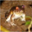
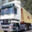
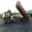
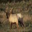
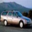
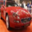
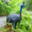
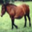
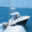
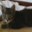
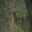
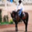
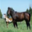
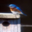
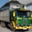

In [2]:
def get_cifar(subset: int = 1):
    cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=IMAGENET_TRANSFORM)
    cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=IMAGENET_TRANSFORM)
    if subset > 1:
        cifar_trainset = Subset(cifar_trainset, indices=range(0, len(cifar_trainset), subset))
        cifar_testset = Subset(cifar_testset, indices=range(0, len(cifar_testset), subset))
    return cifar_trainset, cifar_testset

cifar_trainset, cifar_testset = get_cifar()

imshow(
    cifar_trainset.data[:15],
    facet_col=0,
    facet_col_wrap=5,
    facet_labels=[cifar_trainset.classes[i] for i in cifar_trainset.targets[:15]],
    title="CIFAR-10 images",
    height=600
)

We have also provided a basic training & testing loop, almost identical to the one you used yesterday. This one doesn't use `wandb` at all, although it does plot the train loss and test accuracy when the function finishes running. You should run this function to verify your model is working, and that the loss is going down. Also, make sure you understand what each part of this function is doing.


## Train function - simple (from yesterday)


First, let's define a dataclass to hold our training arguments.


In [3]:
@dataclass
class ResNetTrainingArgs():
    batch_size: int = 64
    max_epochs: int = 3
    max_steps: int = 500
    optimizer: t.optim.Optimizer = t.optim.Adam
    learning_rate: float = 1e-3
    log_dir: str = os.getcwd() + "/logs"
    log_name: str = "day4-resnet"
    log_every_n_steps: int = 1
    n_classes: int = 10
    subset: int = 10

Now we'll write a new class to inherit from `LightningModule`. The one below is taken from yesterday's solutions (it includes the `_shared_train_val_step` method to take advantage of duplicated code). You should feel free to replace it with your own implementation, if you prefer.


In [6]:
class LitResNet(pl.LightningModule):
    def __init__(self, args: ResNetTrainingArgs):
        super().__init__()
        self.args = args
        self.resnet = get_resnet_for_feature_extraction(self.args.n_classes)
        self.trainset, self.testset = get_cifar(subset=self.args.subset)

    def forward(self, x: t.Tensor) -> t.Tensor:
        return self.resnet(x)

    def _shared_train_val_step(self, batch: Tuple[t.Tensor, t.Tensor]) -> Tuple[t.Tensor, t.Tensor]:
        imgs, labels = batch
        logits = self(imgs)
        return logits, labels

    def training_step(self, batch: Tuple[t.Tensor, t.Tensor], batch_idx: int) -> t.Tensor:
        logits, labels = self._shared_train_val_step(batch)
        loss = F.cross_entropy(logits, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch: Tuple[t.Tensor, t.Tensor], batch_idx: int) -> None:
        logits, labels = self._shared_train_val_step(batch)
        classifications = logits.argmax(dim=1)
        accuracy = t.sum(classifications == labels) / len(classifications)
        self.log("accuracy", accuracy)

    def configure_optimizers(self):
        return self.args.optimizer(self.resnet.out_layers.parameters(), lr=self.args.learning_rate)

    def train_dataloader(self):
        return DataLoader(self.trainset, batch_size=self.args.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.testset, batch_size=self.args.batch_size, shuffle=False)

Lastly, we run our model.


In [7]:
args = ResNetTrainingArgs()
model = LitResNet(args)
logger = CSVLogger(save_dir=args.log_dir, name=args.log_name)

trainer = pl.Trainer(
    max_epochs=args.max_epochs,
    logger=logger,
    log_every_n_steps=args.log_every_n_steps,
)
trainer.fit(model=model)

metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type     | Params
------------------------------------
0 | resnet | ResNet34 | 21.3 M
------------------------------------
5.1 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).



Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [8]:
plot_train_loss_and_test_accuracy_from_metrics(metrics, "Feature extraction with ResNet34")

Let's see how well our ResNet performs on the first few inputs!


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).




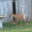


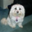


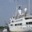

In [9]:
def test_resnet_on_random_input(n_inputs: int = 3):
    indices = np.random.choice(len(cifar_trainset), n_inputs).tolist()
    classes = [cifar_trainset.classes[cifar_trainset.targets[i]] for i in indices]
    imgs = cifar_trainset.data[indices]
    with t.inference_mode():
        x = t.stack(list(map(IMAGENET_TRANSFORM, imgs)))
        logits: t.Tensor = model.resnet(x)
    probs = logits.softmax(-1)
    if probs.ndim == 1: probs = probs.unsqueeze(0)
    for img, label, prob in zip(imgs, classes, probs):
        display(HTML(f"<h2>Classification probabilities (true class = {label})</h2>"))
        imshow(
            img,
            width=200, height=200, margin=0,
            xaxis_visible=False, yaxis_visible=False
        )
        bar(
            prob,
            x=cifar_trainset.classes,
            template="ggplot2", width=600, height=400,
            labels={"x": "Classification", "y": "Probability"},
            text_auto='.2f', showlegend=False,
        )

test_resnet_on_random_input()

## What is Weights and Biases?

Weights and Biases is a cloud service that allows you to log data from experiments. Your logged data is shown in graphs during training, and you can easily compare logs across different runs. It also allows you to run **sweeps**, where you can specifiy a distribution over hyperparameters and then start a sequence of test runs which use hyperparameters sampled from this distribution.

Before you run any of the code below, you should visit the [Weights and Biases homepage](https://wandb.ai/home), and create your own account.


In [10]:
import wandb

If we were writing vanilla training loops using PyTorch, then we'd need to make quite a few changes to use Weights and Biases. However, once again PyTorch Lightning will abstract away some of the key difficulties for us. In fact, all we need to change at first is our logger (from the `CSVLogger` class to `WandbLogger`). We've defined a new dataclass below which allows us to do exactly that:


In [11]:
@dataclass
class ResNetTrainingArgsWandb(ResNetTrainingArgs):
    run_name: Optional[str] = None

A few notes about this code:

* We've defined this new class by inheriting from the previous `ResNetFinetuningArgs` class. Again, this is a useful way to extend functionality while keeping the code short and clean.
* The `run_name` argument gets optionally supplied to our `WandbLogger` object (see below). If you don't specify it, then your runs will be given random names which look like `jolly-sea-1`, `fluent-snowflake-2`, `brisk-smoke-3`, etc.
* If we were using vanilla PyTorch, we'd start a run by calling `wandb.init()`. In Lightning, this is done automatically for us the moment we define our logger.


Now let's run our training code, but with this new dataclass. Note that we've also included the function `wandb.finish()` at the end of the cell. This terminates the current run. It's called automatically in scripts, but in notebooks you'll need to add this before you can start a new run.

When you run the cell below for the first time, you'll have to login to Weights and Biases, and paste an API key into VSCode. After this is done, your Weights and Biases training run will start. It'll give you a lot of output text, one line of which will look like:

```
View run at https://wandb.ai/<USERNAME>/<PROJECT-NAME>/runs/<RUN-NAME>
```

which you can click on to visit the run page.

A nice thing about using Weights and Biases is that you don't need to worry about generating your own plots, that will all be done for you when you visit the page.


In [12]:
args = ResNetTrainingArgsWandb()
model = LitResNet(args)
logger = WandbLogger(save_dir=args.log_dir, project=args.log_name, name=args.run_name)

trainer = pl.Trainer(
    max_epochs=args.max_epochs,
    max_steps=args.max_steps,
    logger=logger,
    log_every_n_steps=args.log_every_n_steps,
)
trainer.validate(model=model)
trainer.fit(model=model)
wandb.finish()

Files already downloaded and verified
Files already downloaded and verified


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).



┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.10599999874830246    │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type     | Params
------------------------------------
0 | resnet | ResNet34 | 21.3 M
------------------------------------
5.1 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


### Run & project pages

The page you visit will show you a plot of all the variables you've logged, among other things. You can do many things with these plots (e.g. click on the "edit" icon for your `train_loss` plot, and apply smoothing to get a better picture of your loss curve).

The charts are a useful feature of the run page that gets opened when you click on the run page link, but they're not the only feature. You can also navigate to the project page (click on the option to the right of **Projects** on the bar at the top of the Wandb page), and see superimposed plots of all the runs in this project. You can also click on the **Table** icon on the left hand sidebar to see a table of all the runs in this project, which contains useful information (e.g. runtime, the most recent values of any logged variables, etc). However, comparing runs like this becomes especially useful when we start doing hyperparameter search.


## Hyperparameter search

One way to search for good hyperparameters is to choose a set of values for each hyperparameter, and then search all combinations of those specific values. This is called **grid search**. The values don't need to be evenly spaced and you can incorporate any knowledge you have about plausible values from similar problems to choose the set of values. Searching the product of sets takes exponential time, so is really only feasible if there are a small number of hyperparameters. I would recommend forgetting about grid search if you have more than 3 hyperparameters, which in deep learning is "always".

A much better idea is for each hyperparameter, decide on a sampling distribution and then on each trial just sample a random value from that distribution. This is called **random search** and back in 2012, you could get a [publication](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf) for this. The diagram below shows the main reason that random search outperforms grid search. Empirically, some hyperparameters matter more than others, and random search benefits from having tried more distinct values in the important dimensions, increasing the chances of finding a "peak" between the grid points.


<img src="https://raw.githubusercontent.com/callummcdougall/Fundamentals/main/images/grid_vs_random.png" width="540">


It's worth noting that both of these searches are vastly less efficient than gradient descent at finding optima - imagine if you could only train neural networks by randomly initializing them and checking the loss! Either of these search methods without a dose of human (or eventually AI) judgement is just a great way to turn electricity into a bunch of models that don't perform very well.


## Running hyperparameter sweeps with `wandb`

Now we've come to one of the most impressive features of `wandb` - being able to perform hyperparameter sweeps.

To perform hyperparameter sweeps, we follow the following 3-step process:

1. Define a `sweep_config` dict, which specifies how we'll randomize hyperparameters during our sweep (more on the exact syntax of this below).
2. Define a training function. Importantly, this function just take no arguments (i.e. you should be able to call it as `train()`).
    * You will be able to access the values inside `sweep_config["parameters"]` dict using `wandb.config`, you should do this inside your `train()` function.
3. Run a sweep, using the `wandb.sweep` and `wandb.agent` functions. This will run the training function with different hyperparameters each time.



Here is an example below. Run this code, then click on the link which is presented as:

```
View sweep at https://wandb.ai/<USERNAME>/<PROJECT-NAME>/sweeps/<SWEEP-NAME>
```

This link will bring you to a page comparing each of your sweeps. You'll be able to see overlaid graphs of each of their training loss and test accuracy, as well as a bunch of other cool things like:

* Bar charts of the [importance](https://docs.wandb.ai/ref/app/features/panels/parameter-importance) (and correlation) of each hyperparameter wrt the target metric. Note that only looking at the correlation could be misleading - something can have a correlation of 1, but still have a very small effect on the metric.
* A [parallel coordinates plot](https://docs.wandb.ai/ref/app/features/panels/parallel-coordinates), which summarises the relationship between the hyperparameters in your config and the model metric you're optimising.


### Exercise - define a sweep config (step 1)

```c
Difficulty: 🟠🟠⚪⚪⚪
Importance: 🟠🟠🟠🟠⚪

You should spend up to 10-15 minutes on this exercise.

Learning how to use wandb for sweeps is very useful, so make sure you understand all parts of this code, not just the exercises.
```

You should define a dictionary `sweep_config`, which sets out the following rules for hyperparameter sweeps:

* Hyperparameters are chosen **randomly**, according to the distributions given in the dictionary
* Your goal is to **maximize** the **accuracy** metric (note that this is one of the metrics we logged in the Lightning training class above)
* The hyperparameters you vary are:
    * `learning_rate` - a log-uniform distribution between 1e-4 and 1e-1
    * `batch_size` - randomly chosen from (32, 64, 128, 256)
    * `max_epochs` - randomly chosen from (1, 2, 3)

*(A note on the log-uniform distribution - this means a random value `X` will be chosen between `min` and `max` s.t. `log(X)` is uniformly distributed between `log(min)` and `log(max)`. Can you see why a log uniform distribution for the learning rate makes more sense than a uniform distribution?)*

You can read the syntax for sweep config dictionaries [here](https://docs.wandb.ai/guides/sweeps/define-sweep-configuration).


In [16]:
# sweep_config = dict()
sweep_config = {
    'method': 'random',
    'name': 'sweep',
    'metric': {
        'goal': 'maximize',
        'name': 'accuracy'
        },
    'parameters': {
        'learning_rate': {'distribution': 'log_uniform_values', 'min': 1e-4, 'max': 1e-1},
        'batch_size': {'values': [32, 64,128,256]},
        'max_epochs': {'values': [1,2,3]},

     }
}
tests.test_sweep_config(sweep_config)

<details>
<summary>Solution</summary>


```python
sweep_config = dict(
    method = 'random',
    metric = dict(name = 'accuracy', goal = 'maximize'),
    parameters = dict(
        batch_size = dict(values = [32, 64, 128, 256]),
        max_epochs = dict(min = 1, max = 4),
        learning_rate = dict(max = 0.1, min = 0.0001, distribution = 'log_uniform_values'),
    )

```
</details>


### Define a training function (step 2)

Now, we have a `train` function. This takes no arguments, and it implements a training loop just like we've seen before. Note that we've set things like `args.batch_size` from the `wandb.config` dictionary, which is how we access the hyperparameters which are set at the start of each sweep.

<details>
<summary>Question - why do we set these parameters after defining our <code>args</code> object?</summary>

Weights & Biases is very particular about the order in which things are defined. We can't access the `wandb.config` object until we've called `wandb.init()`, which implicitly happens when we define our logger. But we use some of the args from `args` to define our logger!

The easiest solution is to define `args` first, then define the logger, then override the `args` values with the `wandb.config` values. There are also other ways to do this, for example:

* Set up two different dataclasses, one specifically for holding the hyperparameters which vary during sweeps.
* Create a method for the `ResNetTrainingArgsWandb` class which takes the `wandb.config` object, and updates all values based on this.

Which method you choose is down to personal preference.
</details>


In [17]:
# (2) Define a training function which takes no args, and uses `wandb.config` to get hyperparams

def train():
    # Define hyperparameters, override some with values from wandb.config
    args = ResNetTrainingArgsWandb()
    logger = WandbLogger(save_dir=args.log_dir, project=args.log_name, name=args.run_name)

    args.batch_size=wandb.config["batch_size"]
    args.max_epochs=wandb.config["max_epochs"]
    args.learning_rate=wandb.config["learning_rate"]

    model = LitResNet(args)

    trainer = pl.Trainer(
        max_epochs=args.max_epochs,
        max_steps=args.max_steps,
        logger=logger,
        log_every_n_steps=args.log_every_n_steps
    )
    trainer.fit(model=model)

### Run your sweep (step 3)

Finally, you can use the code below to run your sweep! This will probably take a while, because you're doing three separate full training and validation runs.


In [18]:
sweep_id = wandb.sweep(sweep=sweep_config, project='day4-resnet-sweep')
wandb.agent(sweep_id=sweep_id, function=train, count=3)
wandb.finish()

Create sweep with ID: 3jnogsrz
Sweep URL: https://wandb.ai/rohansubramani/day4-resnet-sweep/sweeps/3jnogsrz


wandb: Agent Starting Run: qzgg1p4c with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0059089375186822096
wandb: 	max_epochs: 2
wandb: Currently logged in as: rohansubramani. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type     | Params
------------------------------------
0 | resnet | ResNet34 | 21.3 M
------------------------------------
5.1 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning:

The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).



Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


wandb: Agent Starting Run: xlin54pz with config:
wandb: 	batch_size: 256
wandb: 	learning_rate: 0.010313246966686233
wandb: 	max_epochs: 2
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type     | Params
------------------------------------
0 | resnet | ResNet34 | 21.3 M
------------------------------------
5.1 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


wandb: Agent Starting Run: 1z3gtqi3 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.00019360246387677428
wandb: 	max_epochs: 1
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type     | Params
------------------------------------
0 | resnet | ResNet34 | 21.3 M
------------------------------------
5.1 K     Trainable params
21.3 M    Non-trainable params
21.3 M    Total params
85.159    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


<details>
<summary>Note on using YAML files (optional)</summary>

Rather than using a dictionary, you can alternatively store the `sweep_config` data in a YAML file if you prefer. You will then be able to run a sweep via the following terminal commands:

```
wandb sweep sweep_config.yaml

wandb agent <SWEEP_ID>
```

where `SWEEP_ID` is the value returned from the first terminal command. You will also need to add another line to the YAML file, specifying the program to be run. For instance, your YAML file might start like this:

```yaml
program: train.py
method: random
metric:
    name: test_accuracy
    goal: maximize
```

For more, see [this link](https://docs.wandb.ai/guides/sweeps/define-sweep-configuration).

</details>


# 3️⃣ Bonus


Congratulations for getting to the end of the main content! This section gives some suggestions for more features of PyTorch Lightning or Weights and Biases to explore, or some other experiments you can run.


## Scaling Laws


These bonus exercises are taken directly from Jacob Hilton's [online deep learning curriculum](https://github.com/jacobhilton/deep_learning_curriculum/blob/master/2-Scaling-Laws.md) (which is what the original version of the ARENA course was based on).

First, you can start by reading the [Chinchilla paper](https://arxiv.org/abs/2203.15556). This is a correction to the original scaling laws paper: parameter count scales linearly with token budget for compute-optimal models, not ~quadratically. The difference comes from using a separately-tuned learning rate schedule for each token budget, rather than using a single training run to measure performance for every token budget. This highlights the importance of hyperparameter tuning for measuring scaling law exponents.

You don't have to read the entire paper, just skim the graphs. Don't worry if they don't all make sense yet (it will be more illuminating when we study LLMs next week). Note that, although it specifically applies to language models, the key underlying ideas of tradeoffs between optimal dataset size and model size are generally applicable.

### Suggested exercise

Perform your own study of scaling laws for MNIST.

- Write a script to train a small CNN on MNIST, or find one you have written previously.
- Training for a single epoch only, vary the model size and dataset size. For the model size, multiply the width by powers of sqrt(2) (rounding if necessary - the idea is to vary the amount of compute used per forward pass by powers of 2). For the dataset size, multiply the fraction of the full dataset used by powers of 2 (i.e. 1, 1/2, 1/4, ...). To reduce noise, use a few random seeds and always use the full validation set.
- The learning rate will need to vary with model size. Either tune it carefully for each model size, or use the rule of thumb that for Adam, the learning rate should be proportional to the initialization scale, i.e. `1/sqrt(fan_in)` for the standard Kaiming He initialization (which is what PyTorch generally uses by default).
    - Note - `fan_in` refers to the variable $N_{in}$, which is `in_features` for a linear layer, and `in_channels * kernel_size * kernel_size` for a convolutional layer - in other words, the number of input parameters/activations we take a sumproduct over to get each output activation.
- Plot the amount of compute used (on a log scale) against validation loss. The compute-efficient frontier should follow an approximate power law (straight line on a log scale).
How does validation accuracy behave?
- Study how the compute-efficient model size varies with compute. This should also follow an approximate power law. Try to estimate its exponent.
- Repeat your entire experiment with 20% [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) to see how this affects the scaling exponents.


## Other Lighting features: Checkpoints


PyTorch Lightning will automatically save checkpoints for you. By default, Lightning automatically saves a checkpoint for you in the same directory as the metrics file, with the state of your last training epoch. You can load your model from the most recent checkpoint using:


In [ ]:
# Load from checkpoint
trained_model = LitResNet.load_from_checkpoint(trainer.checkpoint_callback.best_model_path, args=trainer.model.args)

# Check models are identical
assert all([(p1.to(device) == p2.to(device)).all() for p1, p2 in zip(model.resnet.parameters(), trained_model.resnet.parameters())])

You can also customize how checkpoints get saved, e.g. using the following code will only save a single checkpoint, at the epoch when the training loss was lowest:

```python
checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="train_loss", mode="min")

trainer = pl.Trainer(
    ...,
    callbacks = [checkpoint_callback]
)
```

You can access the filepath checkpoints are saved in using `trainer.checkpoint_callback.dirpath` (by default this will be the same as the filepath where metrics are saved, if you use `CSVLogger`).

Lastly, you can manually save checkpoints with `trainer.save_checkpoint(filepath)` (the filepath should have a `ckpt` extension).

Play around with these checkpoint features. Do you find that the checkpoint when minimising training loss is also the same as the one that minimises test accuracy? Does this depend on the hyperparameters you choose?


## Other WandB features: Gradients, Saving & Logging

Weights and Biases can also track gradients for you as your model trains. This is done by calling `wandb.watch(model)` at any point after you've initialised your run (i.e. after you've defined your logger, since that's when the run initialises). For instance, we can just add a line after defining our logger:

```python
logger = WandbLogger(save_dir=args.log_dir, project=args.log_name, name=args.run_name)
logger.watch(model, log="all", log_freq=10)
```

The `log` argument can be `"gradients"`, `"parameters"`, or `"all"`, and the `log_freq` argument tells us how many steps we wait between logging gradients/parameters.

Now, run the code to train your model, and visit the run page. You should eventually see dropdowns for **gradients** and **parameters** appear (you can change the `log` argument above to just `"gradients"` or `"parameters"` if you only want to see one of these).

Have a poke around some of the gradients and parameters. Do most of them look normally distributed? Do they usually have mean around zero?

Here are a few more features you might also want to play around with:

* [Logging media and objects in experiments](https://docs.wandb.ai/guides/track/log?fbclid=IwAR3NxKsGpEjZwq3vSwYkohZllMpBwxHgOCc_k0ByuD9XGUsi_Scf5ELvGsQ) - you'll be doing this during the RL week, and it's useful when you're training generative image models like VAEs and diffusion models.
* [Code saving](https://docs.wandb.ai/guides/app/features/panels/code?fbclid=IwAR2BkaXbRf7cqEH8kc1VzqH_kOJWGxqjUb_JCBq_SCnXOx1oF-Rt-hHydb4) - this captures all python source code files in the current director and all subdirectories. It's great for reproducibility, and also for sharing your code with others.
* [Saving and loading PyTorch models](https://wandb.ai/wandb/common-ml-errors/reports/How-to-Save-and-Load-Models-in-PyTorch--VmlldzozMjg0MTE?fbclid=IwAR1Y9MzFTxIiVBJG06b4ppitwKWR4H5_ncKyT2F_rR5Z_IHawmpBTKskPcQ) - you can do this easily using `torch.save`, but it's also possible to do this directly through Weights and Biases as an **artifact**


## Train your model from scratch

Now that you understand how to run training loops, you can try a big one - training your ResNet from scratch on CIFAR-10 data!

Here are some tips and suggestions for things you can experiment with:

- First, try to reduce training time.
    - Starting with a smaller ResNet than the full `ResNet34` is a good idea. Good hyperparameters on the small model tend to transfer over to the larger model because the architecture and the data are the same; the main difference is the larger model may require more regularization to prevent overfitting.
    - Bad hyperparameters are usually clearly worse by the end of the first 1-2 epochs. If you can train for fewer epochs, you can test more hyperparameters with the same compute. You can manually abort runs that don't look promising, or you can try to do it automatically; [Hyperband](https://www.jmlr.org/papers/volume18/16-558/16-558.pdf) is a popular algorithm for this.
    - Play with optimizations like [Automatic Mixed Precision](https://pytorch.org/docs/stable/amp.html) to see if you get a speed boost.
- Random search for a decent learning rate and batch size combination that allows your model to mostly memorize (overfit) the training set.
    - It's better to overfit at the start than underfit, because it means your model is capable of learning and has enough capacity.
    - Learning rate is often the most important single hyperparameter, so it's important to get a good-enough value early.
    - Eventually, you'll want a learning rate schedule. Usually, you'll start low and gradually increase, then gradually decrease but many other schedules are feasible. [Jeremy Jordan](https://www.jeremyjordan.me/nn-learning-rate/) has a good blog post on learning rates.
        - See [this documentation page](https://lightning.ai/docs/pytorch/latest/common/optimization.html#learning-rate-scheduling) for how PyTorch Lightning can use LR schedulers. Short version - they are returned alongside optimizers from the `configure_optimizers` function, and by default are called at the end of each epoch.
    - Larger batch size increases GPU memory usage and doubling batch size [often allows doubling learning rate](https://arxiv.org/pdf/1706.02677.pdf), up to a point where this relationship breaks down. The heuristic is that larger batches give a more accurate estimate of the direction to update in. Note that on the test set, you can vary the batch size independently and usually the largest value that will fit on your GPU will be the most efficient.
- Add regularization to reduce the amount of overfitting and train for longer to see if it's enough.
    - Data augmention is the first thing to do - flipping the image horizontally and Cutout are known to be effective.
    - Play with the label smoothing parameter to [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
    - Try adding weight decay to Adam. This is a bit tricky - see this [fast.ai](https://www.fast.ai/2018/07/02/adam-weight-decay/) article if you want to do this, as well as the [PyTorch pseudocode](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html).
- Try a bit of architecture search: play with various numbers of blocks and block groups. Or pick some fancy newfangled nonlinearity and see if it works better than ReLU.


## The Optimizer's Curse

The [optimizer's curse](https://www.lesswrong.com/posts/5gQLrJr2yhPzMCcni/the-optimizer-s-curse-and-how-to-beat-it) applies to tuning hyperparameters. The main take-aways are:

- You can expect your best hyperparameter combination to actually underperform in the future. You chose it because it was the best on some metric, but that metric has an element of noise/luck, and the more combinations you test the larger this effect is.
- Look at the overall trends and correlations in context and try to make sense of the values you're seeing. Just because you ran a long search process doesn't mean your best output is really the best.

For more on this, see [Preventing "Overfitting" of Cross-Validation Data](https://ai.stanford.edu/~ang/papers/cv-final.pdf) by Andrew Ng.


---


`wandb` is an incredibly useful tool when training models, and you should find yourself using it a fair amount throughout this program. You can always return to this page of exercises if you forget how any part of it works.
